# Magnetic Torque Precession Experiment

In [6]:
##### import numpy as np
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Markdown, display, HTML
import linear_regression as lr
plt.rc("savefig",dpi=120)
plt.rcParams['figure.figsize'] = (8, 6)

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [7]:
class torque_precession_data:
    L = 0.00139 
    

    
    def __init__(self,data_set, set_number):
        self.data_set = np.array(data_set)
        self.set_number = set_number
        self.B = self.data_set[:,1]
        self.omega = self.data_set[:,3]
        
        self.slope,self.intercept,self.slope_error,self.intercept_error, self.r = lr.summary_stats(self.data_set[:,1],self.data_set[:,3])
        self.slope_through_origin,self.slope_error_through_origin = lr.slope(self.data_set[:,1],self.data_set[:,3],through_origin=True), lr.slope_error(self.data_set[:,1],self.data_set[:,3],through_origin=True)   
        
        self.mu = self.slope*torque_precession_data.L
        self.mu_error = self.slope_error*torque_precession_data.L
        
        self.mu_through_origin = self.slope_through_origin*torque_precession_data.L
        self.mu_error_through_origin = self.slope_error_through_origin*torque_precession_data.L
        
        
        
        
        #error analysis:
        
        
        
    def set_df(self):    #produces a dataframe with the trial data for a set
        trial_list = []
        i = 1
        for trial in self.data_set:
            trial_list.append("Trial " + str(i))
            i +=1
        col = ['I (A)', 'B (T)' , 'Period (s)', '$\\Omega$ (1/s)' ]
        df = pd.DataFrame(self.data_set,index = trial_list, columns = col)
        set_name = 'Set ' + str(self.set_number)
        df.columns.name = set_name
        return df

    def summary_stats(self):
       
    
        slope_pm = self.slope_equation()
        mu_pm = self.mu_equation()
        intercept_pm = self.intercept_equation()
    
        regular_regression_results = [mu_pm, slope_pm,intercept_pm]
    
   
    
        slope_through_origin_pm = self.slope_equation(through_origin=True)
        mu_through_origin_pm = self.mu_equation(through_origin=True)
    
        regression_through_origin_results = [mu_through_origin_pm, slope_through_origin_pm,str(0.0)]
    
        ind = ['Regular Linear Regression','Regression Line Through (0,0)']
        col = ['magnetic moment, $\\mu$', 'slope', '$\\Omega$ intercept']
    
        results = [regular_regression_results,regression_through_origin_results]
        df = pd.DataFrame(results,index = ind, columns = col)
        df.columns.name = 'Summary Stats'
        return df
    
    def slope_equation(self,through_origin = False):
        if through_origin == False:
            return str(round(self.slope,1)) + " $\\pm $" + str(round(self.slope_error,1)) + " $\\frac{1}{T \\cdot s}$"
        
        else:
            return str(round(self.slope_through_origin,1)) + " $\\pm $" + str(round(self.slope_error_through_origin,1)) + " $\\frac{1}{T \\cdot s}$"
    
    def intercept_equation(self):
        return str(round(self.intercept,3)) + " $\\pm $" + str(round(self.intercept_error,3)) + " $\\frac{1}{s}$"
        
    def mu_equation(self,through_origin = False):
        if through_origin == False:
            return str(round(self.mu,3)) + " $\\pm $" + str(round(self.mu_error,3)) + " J/T"
        else:
            return str(round(self.mu_through_origin,3)) + " $\\pm $" + str(round(self.mu_error_through_origin,3)) + " J/T"
    
    def plot(self,through_origin = False):
     
        slope_eq = "$slope = $" + self.slope_equation(through_origin)  
        mu_eq = '$\\mu = $' + self.mu_equation(through_origin)
        axis_font = {'family': 'serif','color':  'darkred','weight': 'bold','size': 12,
        } 
        font_big = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16,
        }   
        B = torque_precession_data.set_df(self).values[:,1]
        omega = torque_precession_data.set_df(self).values[:,3]
        plt.grid()
        if through_origin == False:
            plt.xlim(B.min()*.95,B.max()*1.05)
            plt.ylim(omega.min()*.95, omega.max()*1.05)
            plt.title("Set " + str(self.set_number) + ": $\\Omega$ vs B", fontdict = font_big )
        else:
            plt.xlim(0,B.max()*1.05)
            plt.ylim(0, omega.max()*1.05)
            plt.xlabel("B(T)", fontdict = axis_font)
            plt.ylabel("$\\Omega_p (1/s)$", fontdict = axis_font)
            plt.title("Set " + str(self.set_number) + ": $\\Omega$ vs B, Best Fit Line Through (0,0)", fontdict = font_big )
        
   
    
    #measurements scatter plot
        plt.scatter(B,omega, label = "Measurements", color = 'darkred')
    
    #Best fit line:
        slope = lr.slope(B,omega,through_origin)
        intercept = lr.intercept(B,omega,through_origin)
        B_fit = np.linspace(0,B.max()*1.05)
        omega_fit = B_fit*slope + intercept
        plt.plot(B_fit,omega_fit, label = 'Best Fit Line', color = 'darkred')
        ax = plt.gca()
        plt.text(0.5, 0.75,slope_eq,color = 'darkred', ha='center', va='center', transform=ax.transAxes)
        plt.text(0.5,0.65,mu_eq,color = 'darkred',ha='center',va='center',transform=ax.transAxes)
        plt.ylabel('$\\Omega (1/s)$', fontdict = axis_font)
        plt.xlabel('B (T)', fontdict = axis_font)
        
        ax.legend()
    def plot_omega_over_B(self):
        omega_over_B = self.omega / self.B
        
        plt.xlim(self.B.min()*.95,1.05*self.B.max())
        plt.hlines(self.slope_through_origin,self.B.min(),self.B.max(),color = 'darkred', label = 'height of line $=$ slope of best fit line through (0,0)')
        plt.scatter(self.B,omega_over_B, color = 'darkred')
        plt.grid()
        axis_font = {'family': 'serif','color':  'darkred','weight': 'bold','size': 12,
        } 
        font_big = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16,
        }   
        
        plt.ylabel('$\\frac{\\Omega}{B}$',fontdict = axis_font)
        plt.xlabel('$B$', fontdict = axis_font)
        plt.title('Set ' + str(self.set_number) + ": $\\frac{\\Omega}{B}$ vs B", fontdict = font_big)
        plt.legend()
        
    def residuals_vs_B(self):
        residuals = self.omega - self.B*self.slope - self.intercept
        axis_font = {'family': 'serif','color':  'darkred','weight': 'bold','size': 12,
        } 
        font_big = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16,
        }   
        
        plt.hlines(0,.95*self.B.min(),1.05*self.B.max(), color = 'k')
        plt.scatter(self.B,residuals,color = 'darkred')
        plt.xlim(.95*self.B.min(),1.05*self.B.max())
        plt.grid()
        plt.xlabel('B (T)', fontdict = axis_font)
        plt.ylabel('Residual (1/s)\n$\\Omega-m \\cdot B-c$',fontdict = axis_font)
        plt.title('Set ' + str(self.set_number) + ": Residuals vs B", fontdict = font_big )
        
    @staticmethod
    def experiment_stats(set_list):
        data = []
        sets = []
        for data_set in set_list:
            data.append(data_set.summary_stats())
            sets.append("Set " + str(data_set.set_number))
            
            
        df = pd.concat(data,keys=sets)
        
        return df
        
        
        

        
        
        
        
       
        
        
    
        
data_set1 = [[1.0,0.00137,14.97,2*np.pi/14.97],[1.1,1.1*0.00137,14.1,2*np.pi/14.1],
        [1.2,0.00137*1.2,13.35,2*np.pi/13.35],
        [1.3,1.3*0.00137,11.90,2*np.pi/11.90],
        [1.4,0.00137*1.4,11.2,2*np.pi/11.2],
        [1.5,0.002055,10.1,2*np.pi/10.1], 
        [1.6,.00137*1.6,10.2,2*np.pi/10.2],
        [1.7,0.00137*1.7,9.8,2*np.pi/9.8],
        [1.8,0.00137*1.8,8.2,2*np.pi/8.2],
        [1.9,0.00137*1.9,7.6,2*np.pi/7.6]]   

data_set2 = [[1.0,0.00137,15.08,2*np.pi/15.08],[1.1,1.1*0.00137,14.1,2*np.pi/14.1],
        [1.5,2.0*0.00137,10.51,2*np.pi/10.51],
        [2.5,2.5*0.00137,6.03,2*np.pi/6.03],
        [3.0,0.00137*3.0,4.98,2*np.pi/4.98],
        [3.5,0.004785,4.1,2*np.pi/4.1]]    

def printmd(string):
    display(Markdown(string))


def multi_column_df_display(list_dfs, cols=3):
    html_table = "<table style='width:100%; border:0px'>{content}</table>"
    html_row = "<tr style='border:0px'>{content}</tr>"
    html_cell = "<td style='width:{width}%;vertical-align:top;border:0px'>{{content}}</td>"
    html_cell = html_cell.format(width=100/cols)

    cells = [ html_cell.format(content=df.to_html()) for df in list_dfs ]
    cells += (cols - (len(list_dfs)%cols)) * [html_cell.format(content="")] # pad
    rows = [ html_row.format(content="".join(cells[i:i+cols])) for i in range(0,len(cells),cols)]
    display(HTML(html_table.format(content="".join(rows))))

## RESULTS 

Set 1,I (A),B (T),Period (s),$\Omega$ (1/s)
Trial 1,1.0,0.001370,14.97,0.419718
Trial 2,1.1,0.001507,14.10,0.445616
Trial 3,1.2,0.001644,13.35,0.470651
Trial 4,1.3,0.001781,11.90,0.527999
Trial 5,1.4,0.001918,11.20,0.560999
Trial 6,1.5,0.002055,10.10,0.622098
Trial 7,1.6,0.002192,10.20,0.615999
Trial 8,1.7,0.002329,9.80,0.641141
Trial 9,1.8,0.002466,8.20,0.766242
Trial 10,1.9,0.002603,7.60,0.826735


Summary Stats                       magnetic moment, $\mu$  \
Set 1 Regular Linear Regression      0.436 $\pm $0.036 J/T   
      Regression Line Through (0,0)  0.414 $\pm $0.007 J/T   
Set 2 Regular Linear Regression      0.456 $\pm $0.051 J/T   
      Regression Line Through (0,0)  0.417 $\pm $0.019 J/T   

Summary Stats                                                         slope  \
Set 1 Regular Linear Regression      313.4 $\pm $25.5 $\frac{1}{T \cdot s}$   
      Regression Line Through (0,0)   297.5 $\pm $4.8 $\frac{1}{T \cdot s}$   
Set 2 Regular Linear Regression      328.2 $\pm $36.9 $\frac{1}{T \cdot s}$   
      Regression Line Through (0,0)  300.2 $\pm $13.9 $\frac{1}{T \cdot s}$   

Summary Stats                                      $\Omega$ intercept  
Set 1 Regular Linear Regression      -0.033 $\pm $0.052 $\frac{1}{s}$  
      Regression Line Through (0,0)                               0.0  
Set 2 Regular Linear Regression       -0.098 $\pm $0.12 $\frac{1}{s}$  
      Regression Line Through (0,0)                               0.0

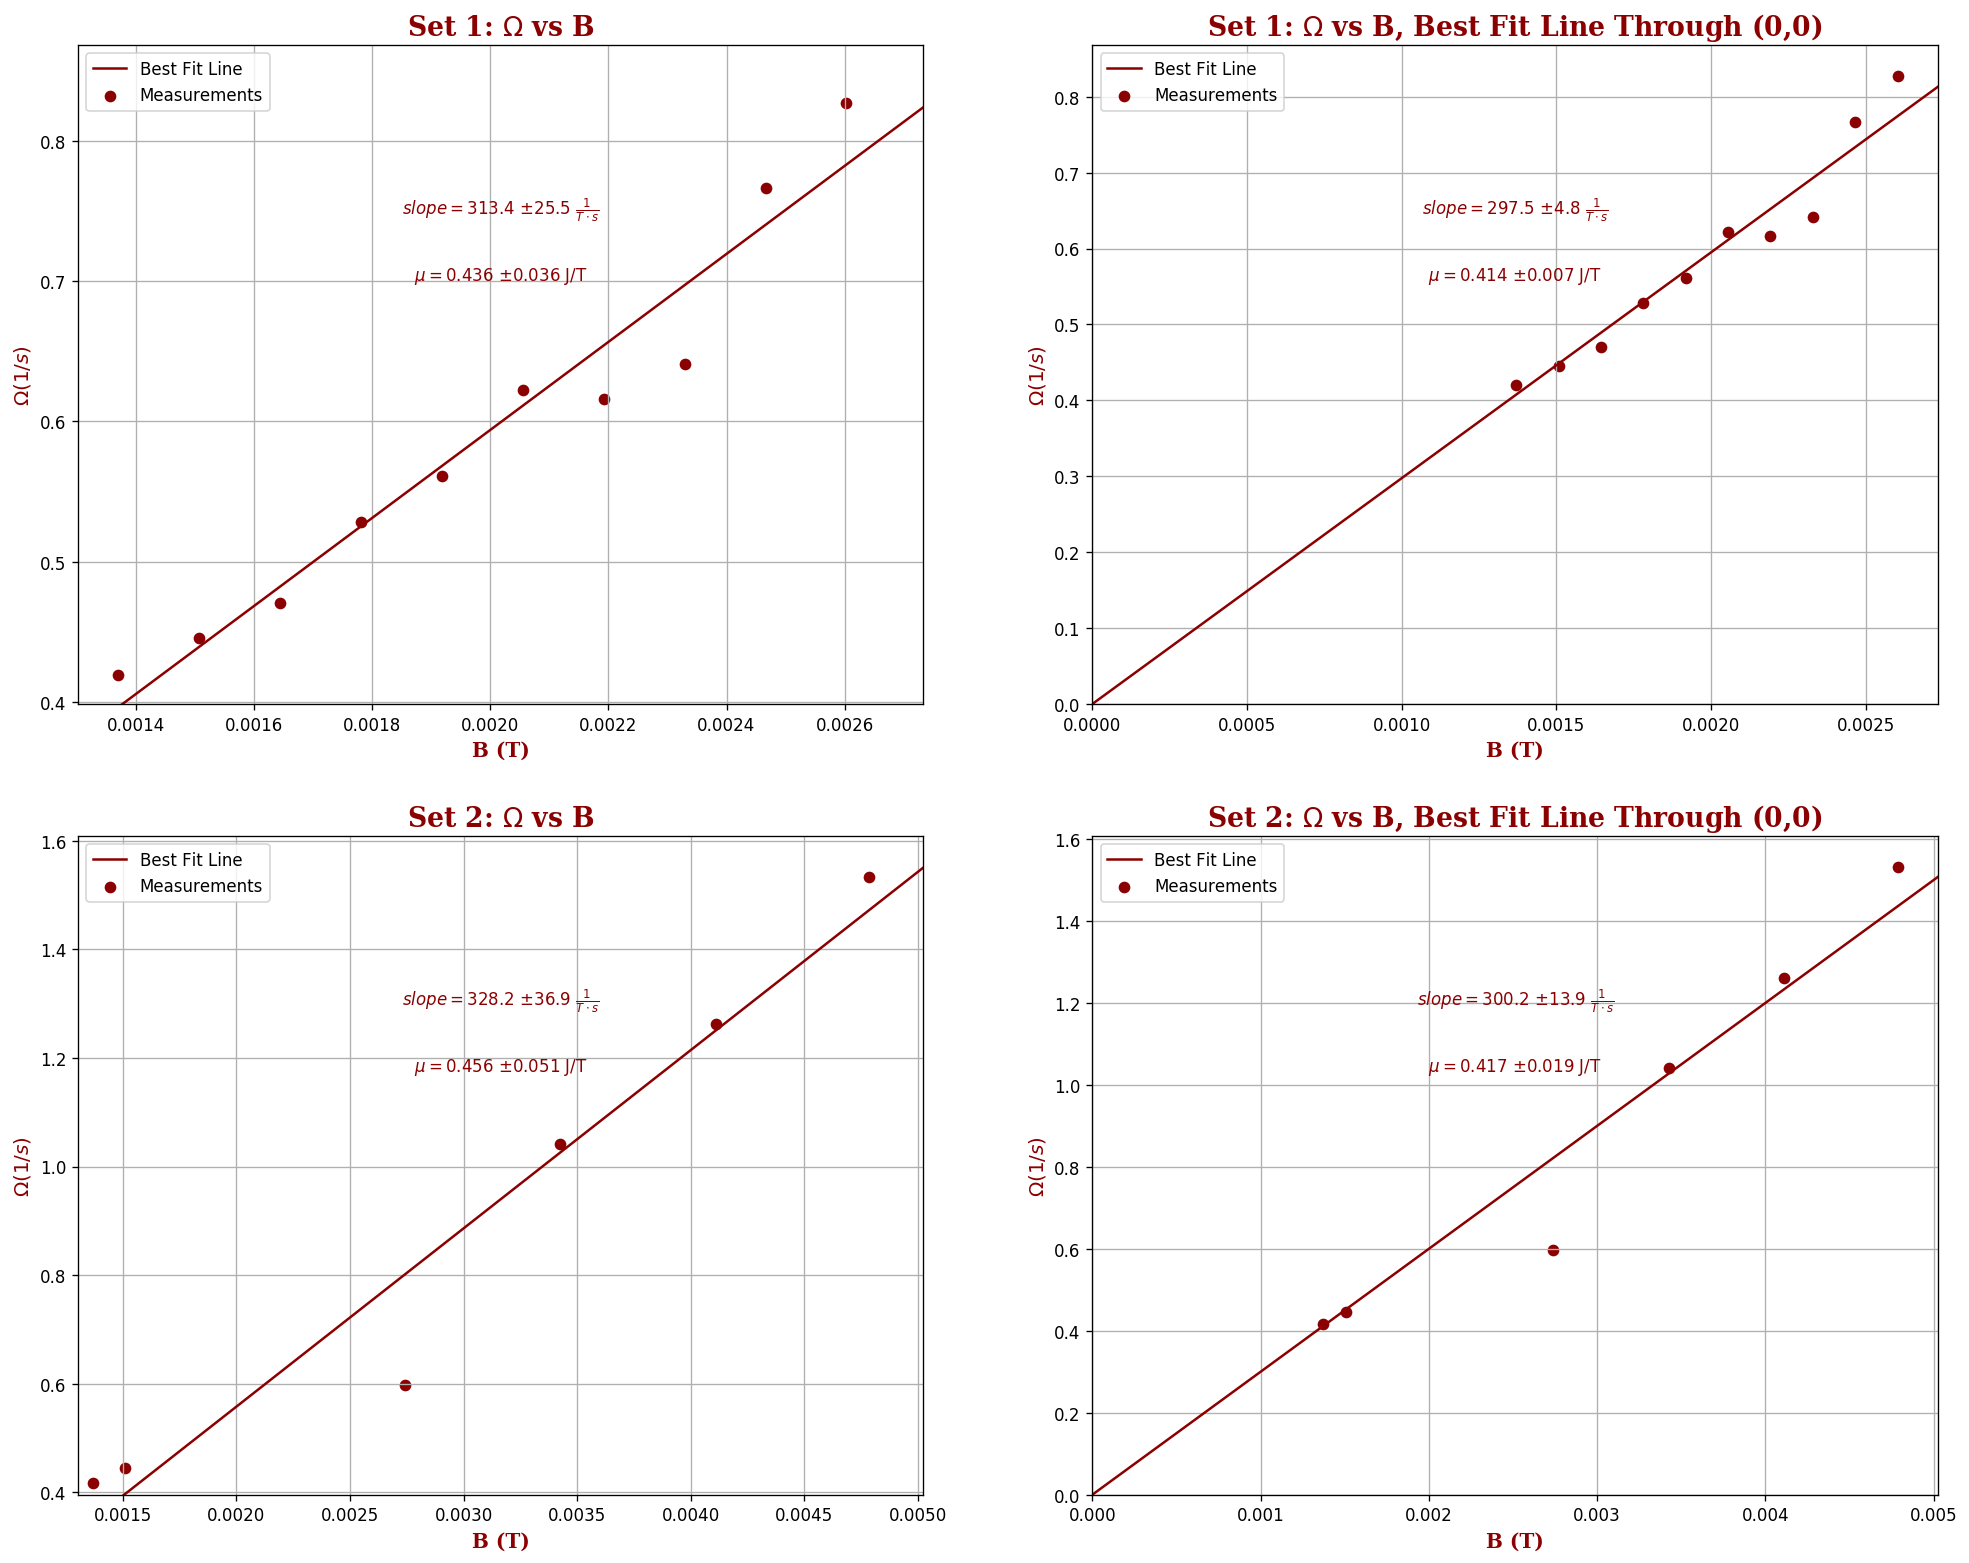

In [8]:
set1 = torque_precession_data(data_set1,1)
set2 = torque_precession_data(data_set2,2)

set1_measurements = set1.set_df()
set2_measurements = set2.set_df()
printmd('## RESULTS ')

measurements = [set1_measurements,set2_measurements]
multi_column_df_display(measurements,2)

display(torque_precession_data.experiment_stats([set1,set2]))

plt.figure(figsize = (20,16))
plt.subplot(2,2,1)
set1.plot()
plt.subplot(2,2,2)
set1.plot(through_origin=True)


plt.subplot(2,2,3)
set2.plot()
plt.subplot(2,2,4)
set2.plot(through_origin=True)
plt.savefig('graphs/torqueprecession/regression_results.png')


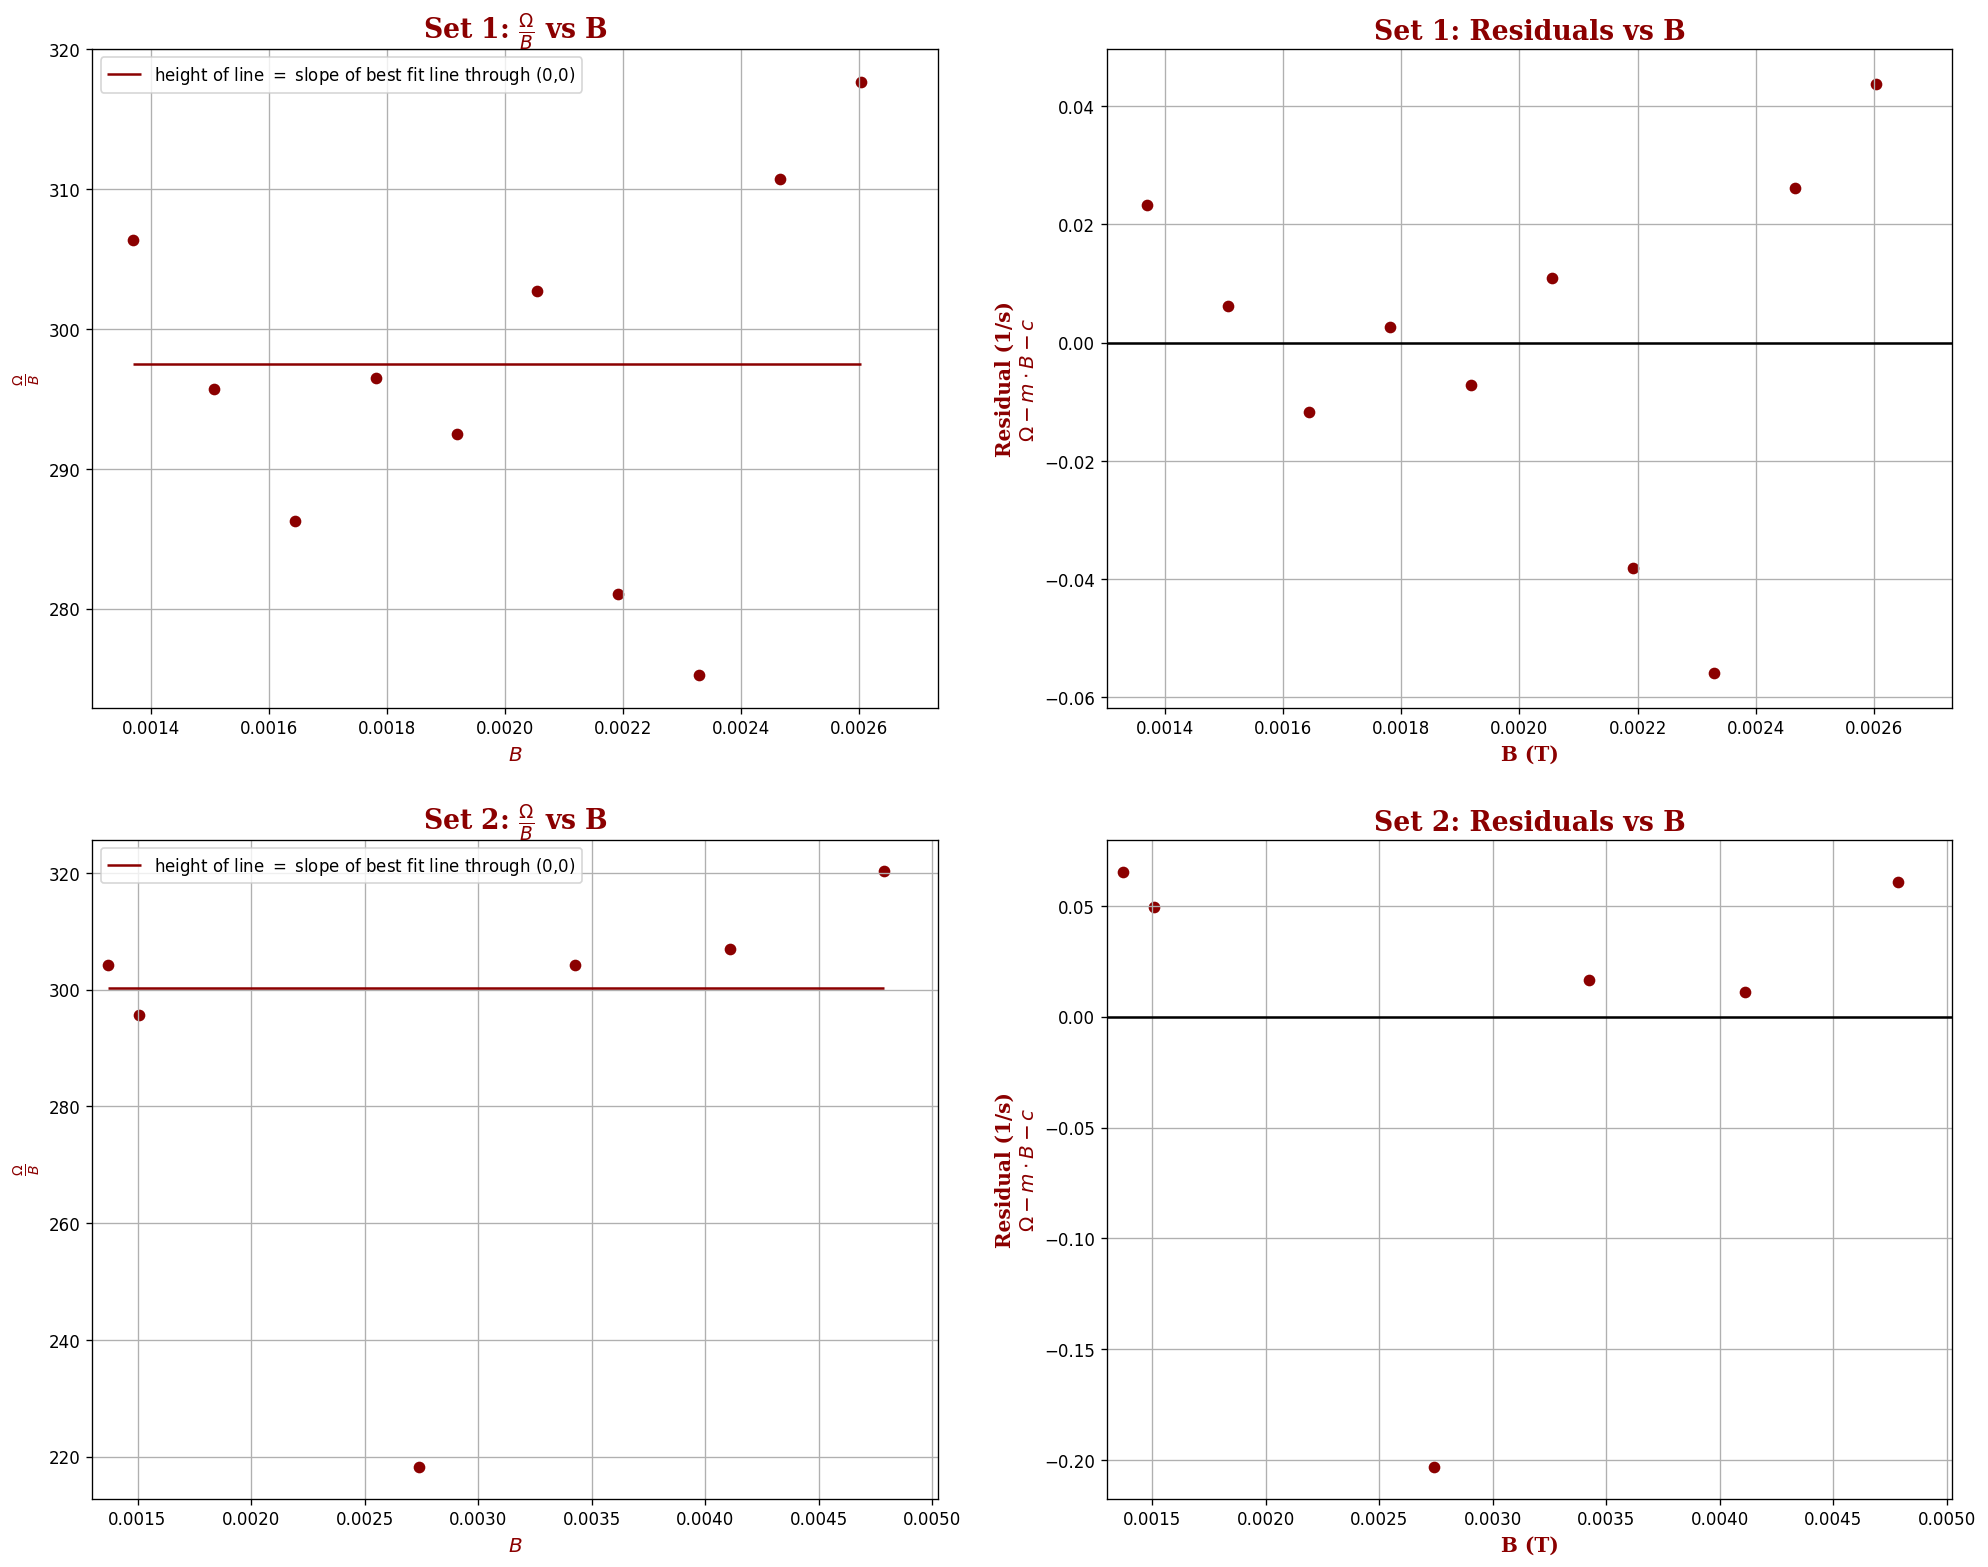

In [9]:
plt.figure(figsize = (20,16))
plt.subplot(2,2,1)
set1.plot_omega_over_B()
plt.subplot(2,2,2)
set1.residuals_vs_B()

plt.subplot(2,2,3)
set2.plot_omega_over_B()
plt.subplot(2,2,4)
set2.residuals_vs_B()
plt.savefig('graphs/torqueprecession/regression_results_2.png')

